In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from keras.datasets import fashion_mnist

In [42]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [43]:
from keras.utils import to_categorical

In [44]:
print('Training data shape :', train_X.shape, train_Y.shape)
print('Testing data shape :', test_X.shape, test_Y.shape)

Training data shape : (60000, 28, 28) (60000,)
Testing data shape : (10000, 28, 28) (10000,)


In [45]:
# find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of output :', nClasses)
print('Output classes :', classes)

Total number of output : 10
Output classes : [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

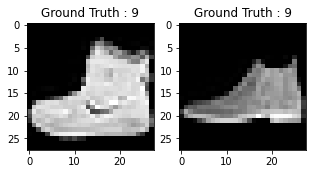

In [46]:
plt.figure(figsize=[5,5])

# display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))


In [47]:
#conversion of the data into matrices

In [48]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [49]:
#from into8 format to float32

In [50]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [51]:
# change the label form categorical ot one-hot encoding (i.e. numbers vector)

In [52]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [53]:
# display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print("After conversion to one-hot:", train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [56]:
#check the shape of the data, once again:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [57]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [58]:
batch_size = 64
epochs = 20
num_classes = 10

In [59]:
# the model

In [60]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [61]:
fashion_model.compile (loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics=['accuracy'])

In [62]:
#summary to see the model built, with corresponding layers:
fashion_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)        

In [63]:
# train the model

In [64]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 86s 2ms/step - loss: 0.4572 - accuracy: 0.8325 - val_loss: 0.3182 - val_accuracy: 0.8863
Epoch 2/20
48000/48000 [==============================] - 83s 2ms/step - loss: 0.2852 - accuracy: 0.8956 - val_loss: 0.2643 - val_accuracy: 0.9012
Epoch 3/20
48000/48000 [==============================] - 77s 2ms/step - loss: 0.2367 - accuracy: 0.9133 - val_loss: 0.2438 - val_accuracy: 0.9117
Epoch 4/20
48000/48000 [==============================] - 77s 2ms/step - loss: 0.2053 - accuracy: 0.9240 - val_loss: 0.2320 - val_accuracy: 0.9162
Epoch 5/20
48000/48000 [==============================] - 80s 2ms/step - loss: 0.1789 - accuracy: 0.9340 - val_loss: 0.2406 - val_accuracy: 0.9133
Epoch 6/20
48000/48000 [==============================] - 84s 2ms/step - loss: 0.1557 - accuracy: 0.9425 - val_loss: 0.2229 - val_accuracy: 0.9213
Epoch 7/20
48000/48000 [==============================] - 79s 2ms/st

In [65]:
#model evaluation

In [66]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [67]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4680984364517033
Test accuracy: 0.9200999736785889


In [68]:
#is there overfitting?

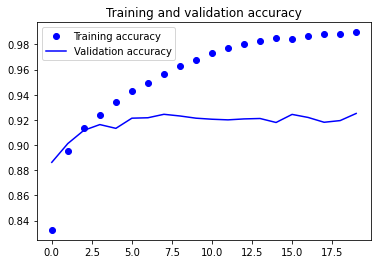

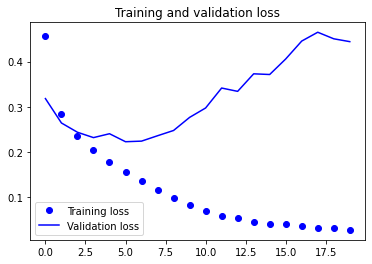

In [73]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [74]:
# yes, signs of overfitting. Let's add the dropout option

In [75]:
batch_size = 64
epochs = 20
num_classes = 10

In [76]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [77]:
fashion_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)         

In [78]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [79]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.5945 - accuracy: 0.7799 - val_loss: 0.3673 - val_accuracy: 0.8678
Epoch 2/20
48000/48000 [==============================] - 90s 2ms/step - loss: 0.3780 - accuracy: 0.8592 - val_loss: 0.3140 - val_accuracy: 0.8829
Epoch 3/20
48000/48000 [==============================] - 89s 2ms/step - loss: 0.3287 - accuracy: 0.8782 - val_loss: 0.2902 - val_accuracy: 0.8883
Epoch 4/20
48000/48000 [==============================] - 90s 2ms/step - loss: 0.3004 - accuracy: 0.8879 - val_loss: 0.2618 - val_accuracy: 0.9029
Epoch 5/20
48000/48000 [==============================] - 91s 2ms/step - loss: 0.2819 - accuracy: 0.8956 - val_loss: 0.2612 - val_accuracy: 0.9043
Epoch 6/20
48000/48000 [==============================] - 95s 2ms/step - loss: 0.2651 - accuracy: 0.9016 - val_loss: 0.2438 - val_accuracy: 0.9108
Epoch 7/20
48000/48000 [==============================] - 113s 2ms/s

In [80]:
#save the model
fashion_model.save("fashion_model_dropout.h5py")

In [81]:
#evaluation

test_eval=fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 4s 385us/step


In [82]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22120561495721341
Test accuracy: 0.9172000288963318


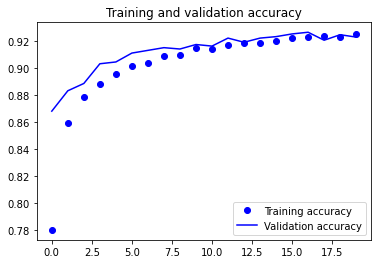

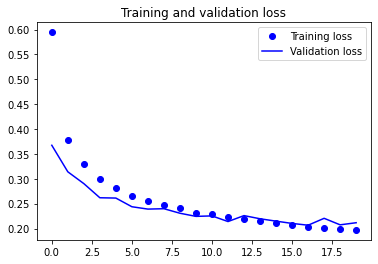

In [83]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [84]:
#way better!

In [94]:
#predict labels
predicted_classes = fashion_model.predict(test_X)


In [98]:
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

In [99]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9121 correct labels


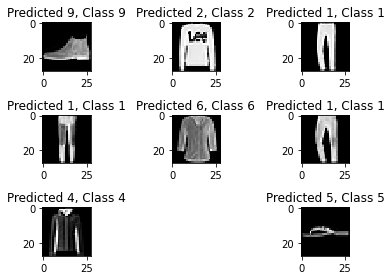

In [100]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 879 incorrect labels


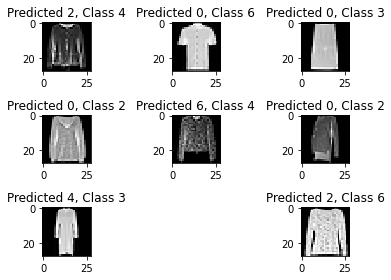

In [102]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [103]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.74      0.92      0.82      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.89      0.83      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.82      0.71      0.76      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

